In [1]:
import numpy as np
import qutip as qu
from numba import jit
from aux import *

In [6]:
seed = 2
dimensions = np.arange(2, 10) #  originally 20
rng = np.random.default_rng(seed)
repetitions = 10000
rhos = [[qu.rand_dm_ginibre(N=d, rank=None)[:] for _ in range(repetitions)]for d in dimensions]

In [7]:
mse_array = [
    np.mean(
        [
            compute_mse_eig_newton_identities(
                i, rhos_given_dimension[sample_i], scale=1e8
            )
            for sample_i in range(repetitions)
        ]
    )
    for i, rhos_given_dimension in zip(dimensions, rhos)
]


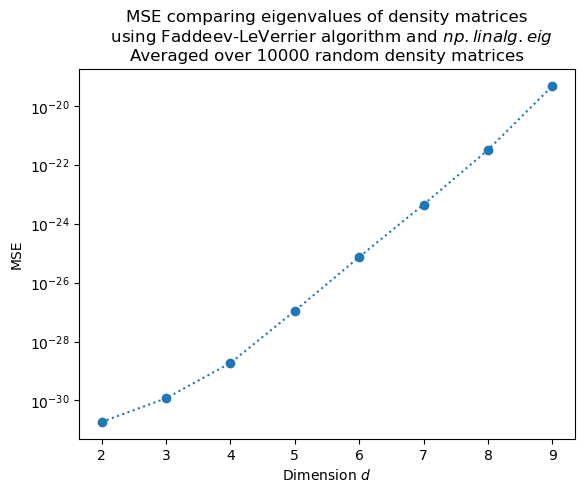

In [22]:
import matplotlib.pyplot as plt

plt.plot(dimensions[0:9], mse_array[0:9], 'o', ls="dotted" )
plt.yscale('log')
plt.xlabel(r"Dimension $d$")
plt.ylabel("MSE")
plt.xticks(dimensions[0:9])
plt.title(r'MSE comparing eigenvalues of density matrices' + "\n" + r'  using Faddeev-LeVerrier algorithm and $np.linalg.eig$ ' + f"\nAveraged over {repetitions} random density matrices")
# plt.plot(dimensions, objective(dimensions, coefs[0], coefs[1]), '-')
plt.show()